In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter
from PIL import Image

# Parameters
growth_rate_w = 0.2  # Controls spiral width
growth_rate_h = 0.1  # Controls spiral height
angle_step = 0.1  # Controls angular resolution
time_steps = 200  # Total steps in simulation

# Function to generate shell points in polar coordinates
def generate_shell_points(growth_rate_w, growth_rate_h, time_steps, angle_step):
    theta = np.arange(0, time_steps * angle_step, angle_step)  # Angular values
    r = np.exp(growth_rate_w * theta)  # Radial distance
    h = -growth_rate_h * theta  # Height decreases with angle
    return theta, r, h

# Function to plot the shell
def plot_shell(theta, r, h, step, save_path=None):
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x, y, h, color='brown', lw=2)
    ax.set_title(f"Shell Growth Step {step}")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Height")
    ax.grid(False)
    ax.axis('off')
    if save_path:
        plt.savefig(save_path, dpi=300)
    plt.close(fig)

# Generate points for the shell
theta, r, h = generate_shell_points(growth_rate_w, growth_rate_h, time_steps, angle_step)

# Save each step as an image for GIF creation
images = []
for step in range(1, len(theta)):
    plot_shell(theta[:step], r[:step], h[:step], step, save_path=f"shell_step_{step}.png")
    images.append(Image.open(f"shell_step_{step}.png"))

# Create an animated GIF
gif_path = "realistic_shell_growth.gif"
images[0].save(
    gif_path, save_all=True, append_images=images[1:], duration=50, loop=0
)

gif_path

'realistic_shell_growth.gif'

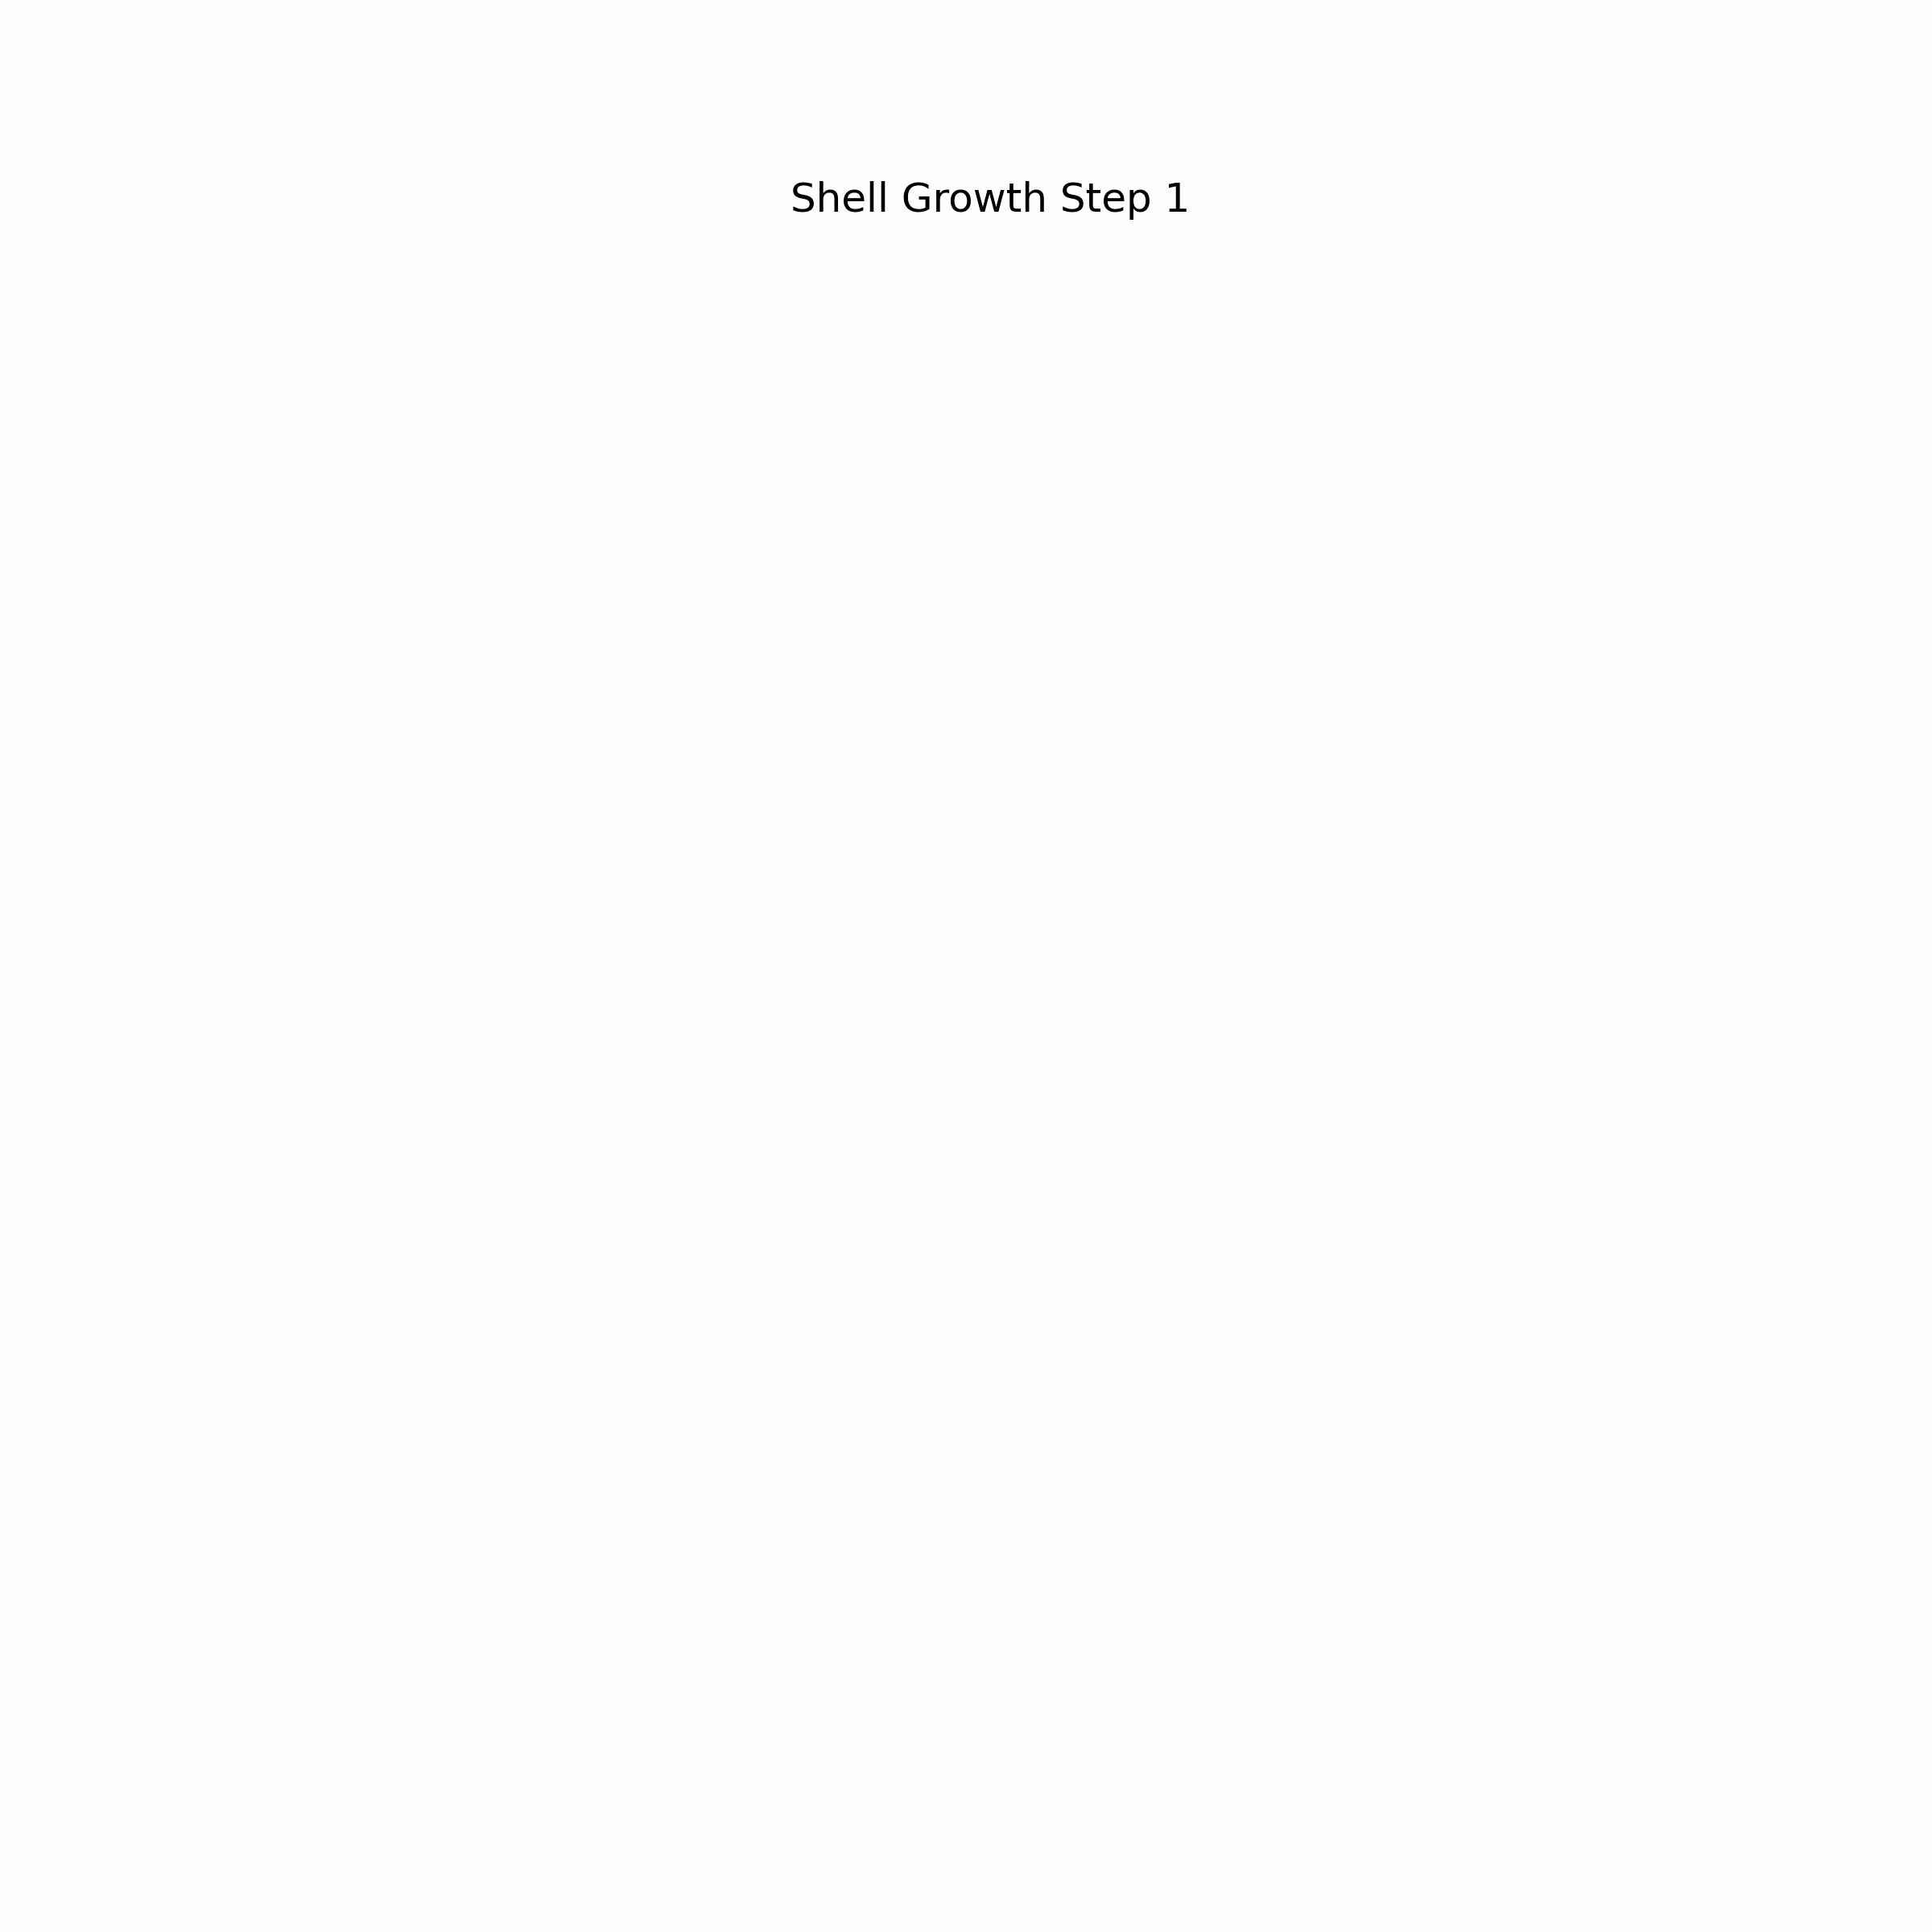

In [8]:
from IPython.display import Image
Image(filename=gif_path)
